In [1]:
import pandas as pd  

# Load dataset  
df = pd.read_csv("/Users/trippy/Desktop/Churn_Prediction_Project/WA_Fn-UseC_-Telco-Customer-Churn.csv")  

# Display first few rows  
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod     

In [4]:
# Convert TotalCharges to numeric, forcing errors to NaN (if any)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Check if any null values are introduced
print("Missing values after conversion:\n", df.isnull().sum())

Missing values after conversion:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
# Fill missing TotalCharges with MonthlyCharges * tenure
df.loc[df["TotalCharges"].isnull(), "TotalCharges"] = df["MonthlyCharges"] * df["tenure"]

# Verify there are no more missing values
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# Convert 'Yes' to 1 and 'No' to 0 for relevant columns
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [8]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=["MultipleLines", "InternetService", "OnlineSecurity",
                                 "OnlineBackup", "DeviceProtection", "TechSupport",
                                 "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"], drop_first=True)

In [9]:
from sklearn.preprocessing import StandardScaler

# Define columns to scale
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# Apply StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [10]:
# Define features and target
X = df.drop(columns=["customerID", "Churn"])  # Drop customerID & target column
y = df["Churn"].map({"Yes": 1, "No": 0})  # Convert target to numeric

In [12]:
print(y.isnull().sum())  # Check if any NaN values exist in y

7043


In [14]:
print(y.mode())  # Check if it has a mode value

Series([], Name: Churn, dtype: float64)


In [15]:
print(y.head())  # See first few rows
print(y.isnull().sum())  # Check missing values
print(y.dtype)  # Check data type

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Churn, dtype: float64
7043
float64


In [17]:
print(y.dtype)  # Check the data type of y
print(y.head())  # See a few values of y

int64
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [18]:
y = df["Churn"].astype(str)  # Convert to string
y = y.str.strip()  # Now remove spaces
y.fillna(y.mode()[0], inplace=True)  # Fill missing values

In [19]:
print(y.dtype)  # Should now be 'object' or 'string'
print(y.head())  # Check first few values
print(y.isnull().sum())  # Should be 0

object
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: object
0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Train-test split done!")

✅ Train-test split done!


In [22]:
print(X_train.dtypes)

gender                                    object
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

In [26]:
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

In [29]:
# Convert all column names to string type
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
import pandas as pd

# Load dataset
df = pd.read_csv("/Users/trippy/Desktop/Churn_Prediction_Project/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display first few rows
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/Users/trippy/Desktop/Churn_Prediction_Project/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# 1. Data Overview
print(df.info())  # Check structure
print(df.describe())  # Summary stats
print(df.isnull().sum())  # Missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/var/folders/65/m7wgk8ds1l9f5m5__4p5yzzh0000gn/T/ipykernel_4757/3052282197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')  # Target variable distribution


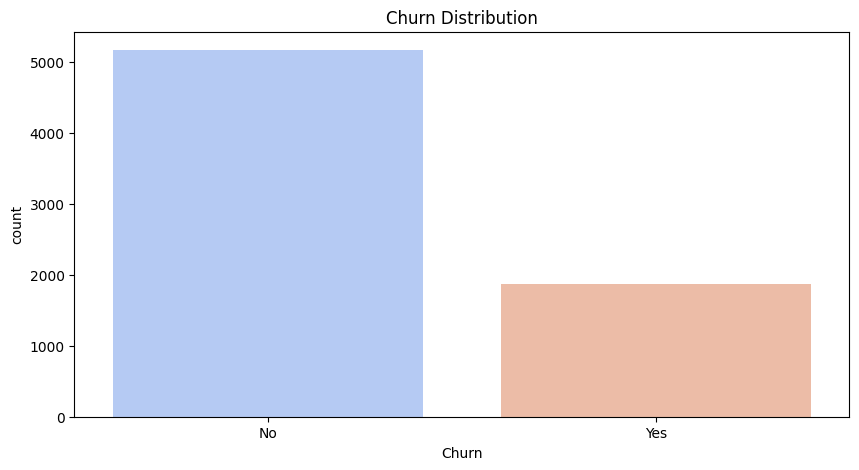

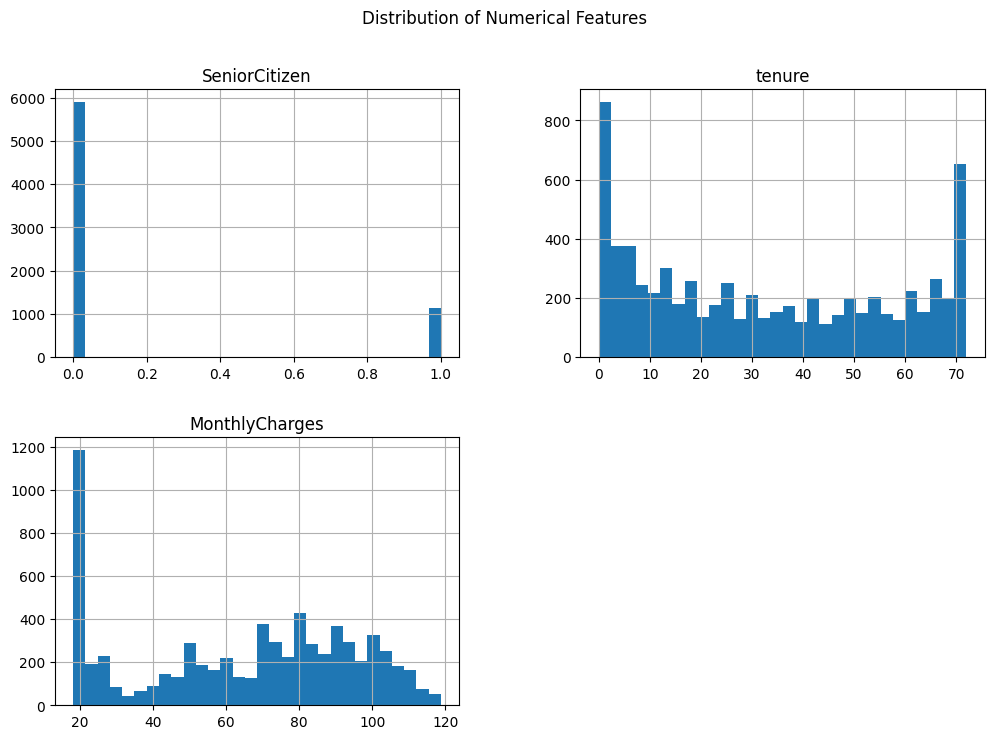

In [35]:
# 2. Univariate Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', data=df, palette='coolwarm')  # Target variable distribution
plt.title("Churn Distribution")
plt.show()

# Histograms for numerical columns
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

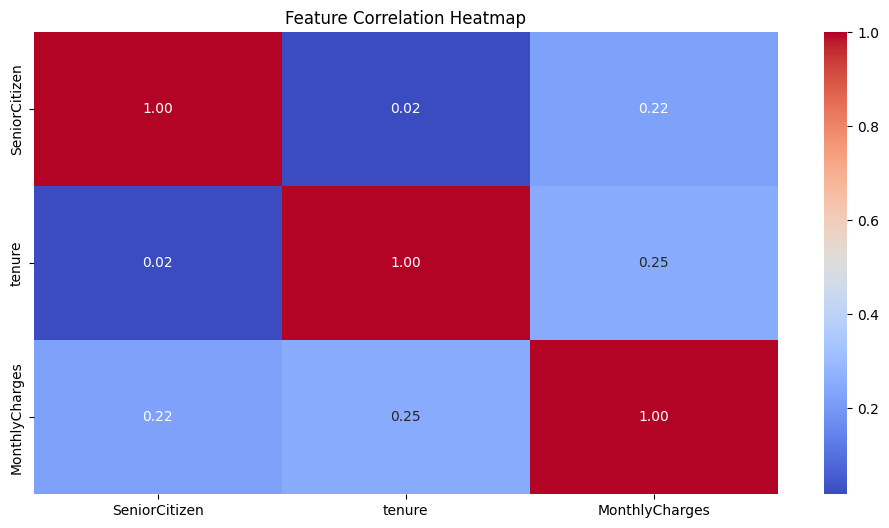

/var/folders/65/m7wgk8ds1l9f5m5__4p5yzzh0000gn/T/ipykernel_4757/180286796.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')


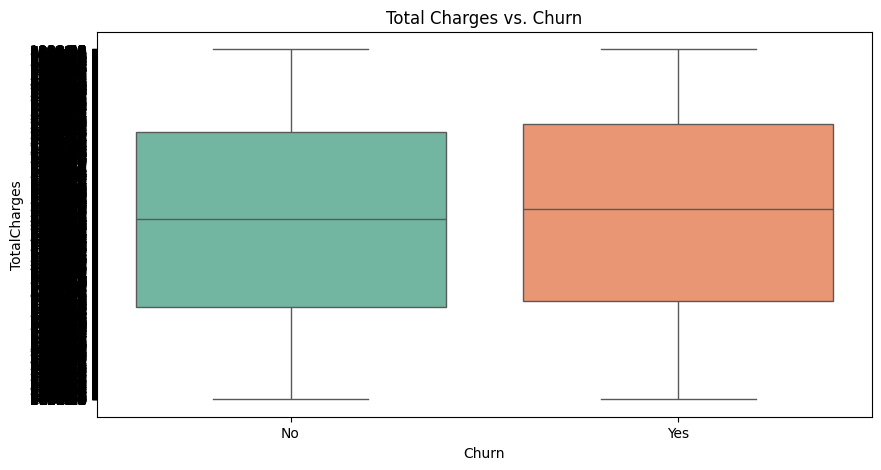

In [36]:
# 3. Bivariate Analysis
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot of TotalCharges vs. Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')
plt.title("Total Charges vs. Churn")
plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

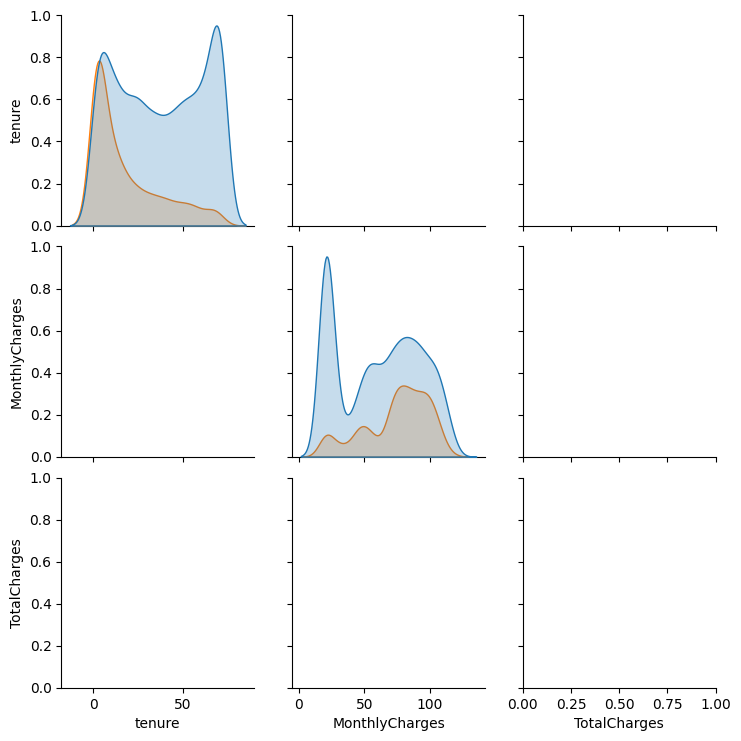

In [37]:
# Pairplot of some important numerical features
sns.pairplot(df, hue="Churn", vars=['tenure', 'MonthlyCharges', 'TotalCharges'])
plt.show()